# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dropout
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [112]:
data=keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    labels='inferred',
    color_mode='rgb',
    label_mode='categorical',
    image_size=(256,256),
    batch_size=32,
    shuffle=True,
    seed=123
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [113]:
data_iterator=data.as_numpy_iterator()

In [114]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

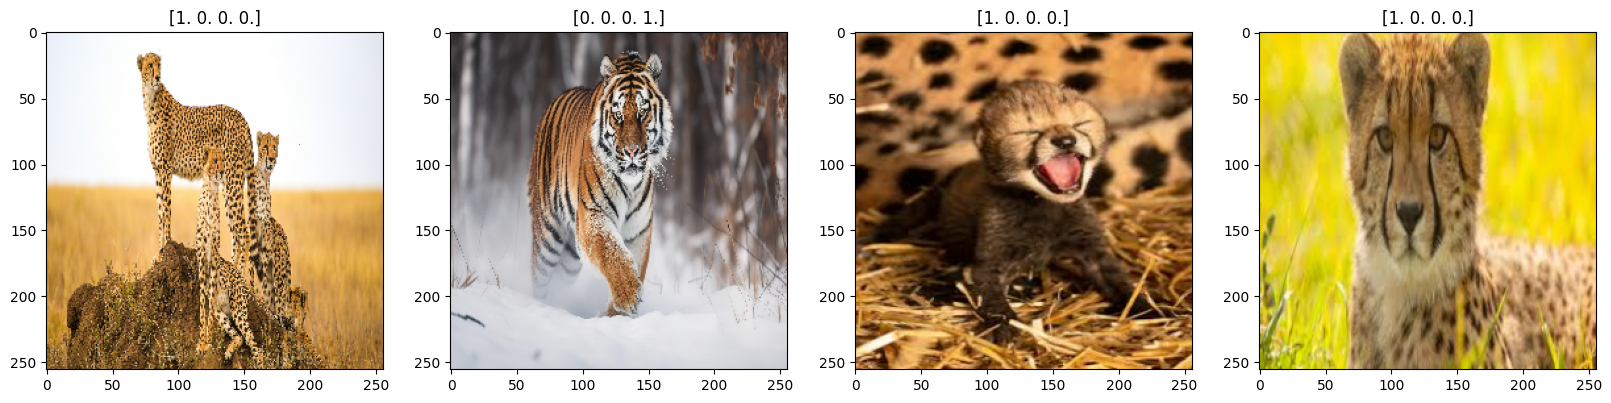

In [115]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [116]:
data=data.map(lambda x,y: (x/255.0, y))
dataset_size = tf.data.experimental.cardinality(data).numpy()
print(dataset_size)

52


**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

(256, 256, 3)
tf.Tensor([0. 0. 0. 1.], shape=(4,), dtype=float32)


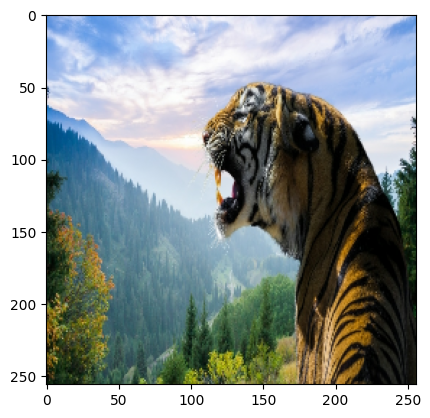

In [126]:
train=data.take(40)
test=data.skip(40)
for image_batch,label_batch in train:
  image=image_batch[0]
  label=label_batch[0]
  print(image.shape)
  print(label)
  plt.imshow(image.numpy().reshape(256,256,3))
  plt.show()
  break

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [127]:
model=keras.Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5) )
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

**Q.6** Compile your model

In [128]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [129]:
model.fit(train,batch_size=32,epochs=25)

Epoch 1/25
40/40 [==============================] - 14s 236ms/step - loss: 1.4006 - accuracy: 0.3141
Epoch 2/25
40/40 [==============================] - 13s 268ms/step - loss: 1.3507 - accuracy: 0.3570
Epoch 3/25
40/40 [==============================] - 13s 269ms/step - loss: 1.2986 - accuracy: 0.4156
Epoch 4/25
40/40 [==============================] - 12s 257ms/step - loss: 1.1880 - accuracy: 0.4914
Epoch 5/25
40/40 [==============================] - 12s 242ms/step - loss: 1.0410 - accuracy: 0.5508
Epoch 6/25
40/40 [==============================] - 12s 233ms/step - loss: 0.8526 - accuracy: 0.6594
Epoch 7/25
40/40 [==============================] - 13s 246ms/step - loss: 0.6578 - accuracy: 0.7422
Epoch 8/25
40/40 [==============================] - 13s 265ms/step - loss: 0.4244 - accuracy: 0.8516
Epoch 9/25
40/40 [==============================] - 13s 271ms/step - loss: 0.2643 - accuracy: 0.9094
Epoch 10/25
40/40 [==============================] - 13s 269ms/step - loss: 0.1752 - accura

**Q.8** Test your code with test set

In [130]:
loss,accuracy=model.evaluate(test,batch_size=64,verbose=2)

12/12 - 13s - loss: 0.4865 - accuracy: 0.9233 - 13s/epoch - 1s/step


In [24]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Try again, not enough accuracy! Your accuracy is 0.8091482520103455


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**